# Ensemble Machine Learning Algorithms in Python with scikit-learn

> Ensembles can give you a boost in accuracy on your dataset.
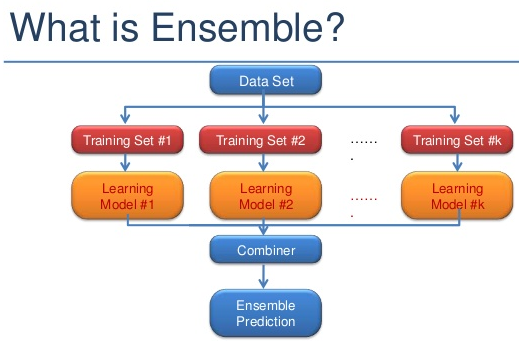
> In this notebook you will discover how you can create some of the most powerful types of ensembles in Python using scikit-learn.

# Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

- **Bagging**. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- **Boosting**. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.

***

This standard classification problem used to demonstrate each ensemble algorithm is the Pima Indians onset of diabetes dataset. It is a binary classification problem where all of the input variables are numeric and have differing scales.
***

# Pima Indians Diabetes Database

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have diabetes?

## 2. Content

> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


## 3. Features

> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

## Importing the libraries

In [539]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set(style="white")
%matplotlib inline

## Loading the data

In [540]:
df=pd.read_csv(r'C:\Users\asmaa\Downloads\Tuwaiq_Four_Week-master\Pair_EnsambleModels\diabetes.csv')

In [541]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [543]:
def transform(x):
    if x == 0:
        return 0 #male
    else:
        return 1#female

df['Gender'] = df['Pregnancies'].apply(transform)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,0


In [544]:
df['Gender'].value_counts()

1    657
0    111
Name: Gender, dtype: int64

In [545]:
dff = df.query("Gender == 1")

In [546]:
dff.groupby(['Outcome']).count()
#Men
#65.77 (no diabetes) 34.23 (diabetes)
#Women
#64.99 (no diabetes) 35.01 (diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Gender
Outcome,,,,,,,,,
0,427,427,427,427,427,427,427,427,427
1,230,230,230,230,230,230,230,230,230


In [547]:
df.Outcome.value_counts()
#unbalanced

0    500
1    268
Name: Outcome, dtype: int64

In [603]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,20.536458,79.799479,31.992188,0.471876,33.240885,0.348958,0.855469
std,3.369578,30.436252,12.117203,15.952218,115.244002,6.879097,0.331329,11.760232,0.476951,0.351857
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.000000,0.243750,24.000000,0.000000,1.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.000000,0.626250,41.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.000000,2.420000,81.000000,1.000000,1.000000


In [549]:
df.shape

(768, 10)

In [550]:
#df[df.SkinThickness ==0]#227
#df[df.BloodPressure ==0]#35
#df[df.BMI ==0]#11
#df[df.Glucose ==0]#5
#df[df.Insulin ==0]#374

In [551]:
#df.drop(df[(df.BMI ==0) & (df.BloodPressure ==0)].index, inplace = True)
#Glucose (44-199)
df.Glucose = df.Glucose.replace(0, df.Glucose.mean()).astype(int)
#BloodPressure 
df.BloodPressure = df.BloodPressure.replace(0, df.BloodPressure.mean()).astype(int)
#BMI
df.BMI = df.BMI.replace(0, df.BMI.mean()).astype(int)

# 1. Data Cleaning

# 2. Data visualization

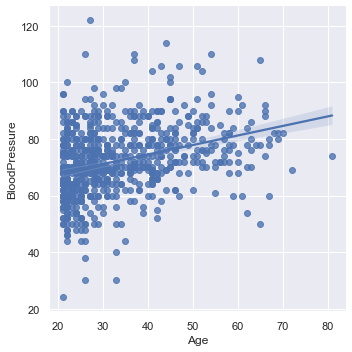

In [563]:
# plot with visualized linear model
sns.set_style('darkgrid')
df_copy2 = df.query("BloodPressure >0 ")
sns.lmplot(x='Age',y='BloodPressure', data=df_copy2, palette='flare');

<AxesSubplot:xlabel='BMI', ylabel='Count'>

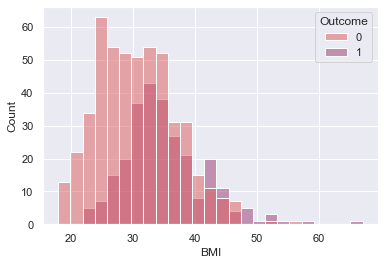

In [562]:
#sns.histplot(data=df, x="BMI")
sns.histplot(x='BMI', data=df, hue='Outcome', palette='flare')

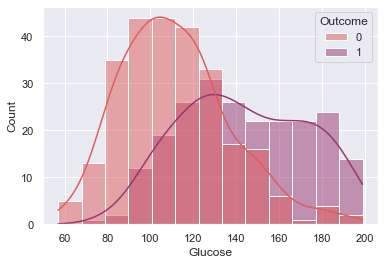

In [556]:
df_copy = df.query("BMI >= 30")
#numeric_features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Gender']
numeric_features=['Glucose']
for col in numeric_features:
    sns.histplot(x=col, data=df_copy,hue='Outcome', palette='flare', kde=True)

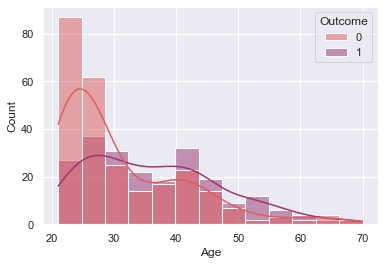

In [557]:
df_copy = df.query("BMI >= 30")
numeric_features=['Age']
for col in numeric_features:
    sns.histplot(x=col, data=df_copy, hue='Outcome', palette='flare', kde=True)

<AxesSubplot:>

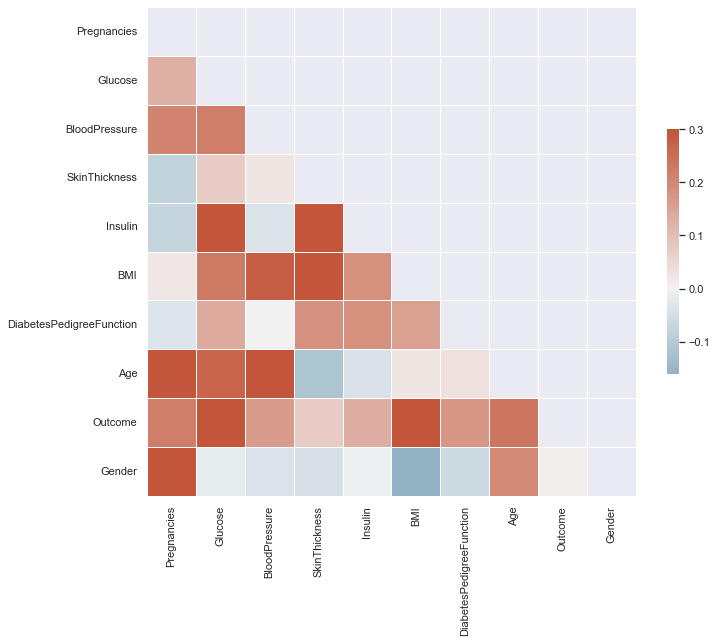

In [417]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [607]:
#df_copy = df.query("BMI >= 30")
#sns.FacetGrid(df_copy, hue="Outcome", )\
#    .map(plt.scatter, "SkinThickness", "Gender")\
#    .add_legend()
#plt.show()

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

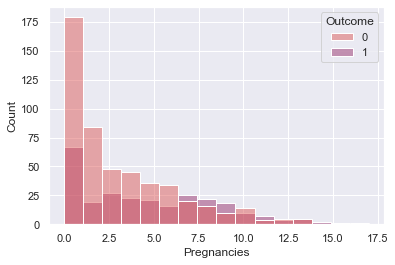

In [564]:
sns.histplot(x='Pregnancies', data=df, hue='Outcome', palette='flare')

<AxesSubplot:xlabel='Age', ylabel='Count'>

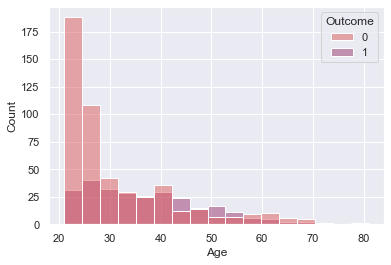

In [565]:
sns.histplot(x='Age', data=df, hue='Outcome', palette='flare')

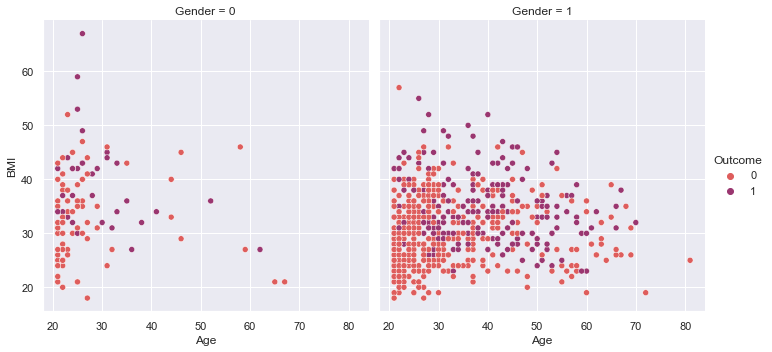

In [584]:
#df_copy1 = df.query("Gender == 1")
sns.relplot(x='Age', y ='BMI',hue='Outcome', col ='Gender',data=df, palette='flare')

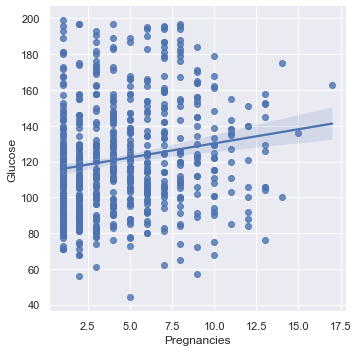

In [567]:
df_copy1 = df.query("Pregnancies > 0")
sns.lmplot(x='Pregnancies',y='Glucose', data=df_copy1, palette='flare');

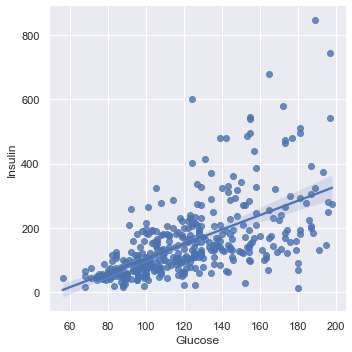

In [423]:
df_copy1 = df.query("Insulin > 0")
sns.lmplot(x='Glucose',y='Insulin', data=df_copy1);

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

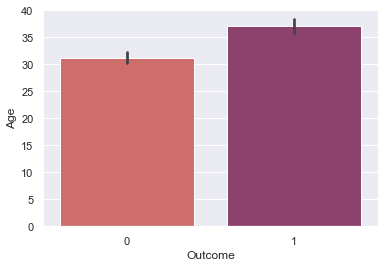

In [568]:
sns.barplot(x='Outcome',y='Age', data=df, palette='flare')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

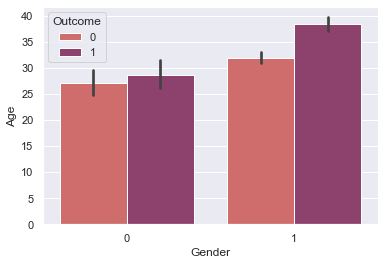

In [569]:
#df_copy1 = df.query("Gender == 1")
sns.barplot(x='Gender', y ='Age',hue='Outcome',data=df, palette='flare')

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

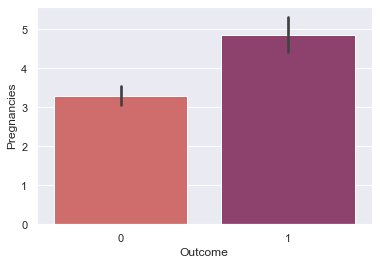

In [606]:
sns.barplot(x='Outcome',y='Pregnancies', data=df,palette='flare')

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

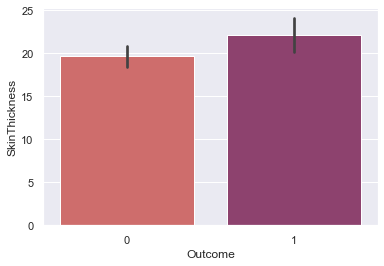

In [605]:
sns.barplot(x='Outcome',y='SkinThickness', data=df,palette='flare')

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

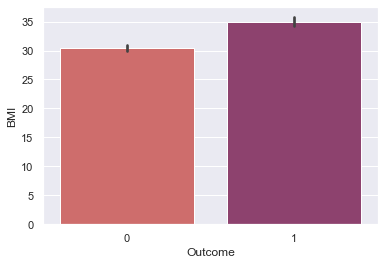

In [570]:
sns.barplot(x='Outcome',y='BMI', data=df, palette='flare')

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

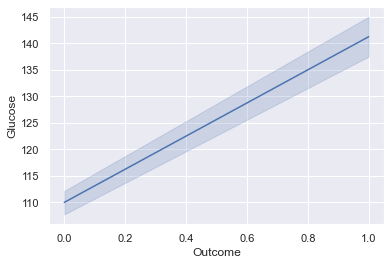

In [30]:
sns.lineplot(data=df, x="Outcome", y="Glucose")

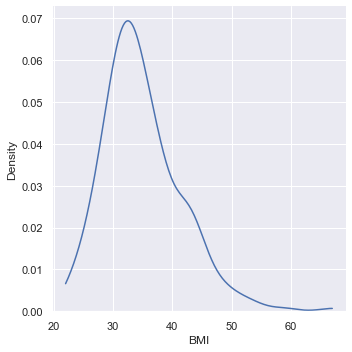

In [447]:
df_copy = df.query("Outcome == 1")
#sns.lineplot(data=df_copy, x="Outcome", y="Glucose")
sns.displot(df_copy, x="BMI", kind="kde", cut=0)

# 3. Data Pre-Processing

- *Split the data into Train vs Test data with 70 vs 30% split*

In [585]:
X = df.drop(columns = 'Outcome')
y = df.Outcome

In [586]:
#Split Data into Train vs Test 
from sklearn.model_selection  import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 4. Baseline Model



- Build a Logistic regression model & Use it metrics on test dataset as *Baseline Model*

In [588]:
# Standerdize the Dataset
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Gender']
scaler = MinMaxScaler()
for col in numeric_features:
    scaler.fit(X_train[col].values.reshape(-1,1))
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1,1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1,1))

In [590]:
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
# 1. Create object 

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred)*100 ,
                                   precision_score(y_test,y_pred)*100, 
                                  f1_score(y_test,y_pred) *100
))

The Model Accuracy is 75.32%,      Recall is 57.50%, Percision is 66.67%,       F1-Score is 61.74% 


# 5. Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered were as follows:

1. Decision Trees
2. Random Forest
3. Extra Trees

# Choose one of those model & fit it to the training dataset

In [593]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(rf_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred)*100 ,
                                   f1_score(y_test,y_pred)*100 ,
                                   precision_score(y_test,y_pred) *100
))

The Model Accuracy is 75.76%,      Recall is 66.25%, Percision is 65.43%,        F1-Score is 64.63% 


In [594]:
importance =  rf_model.feature_importances_
importance_series = pd.Series(importance, index = X_train.columns).sort_values(ascending=False)

<AxesSubplot:>

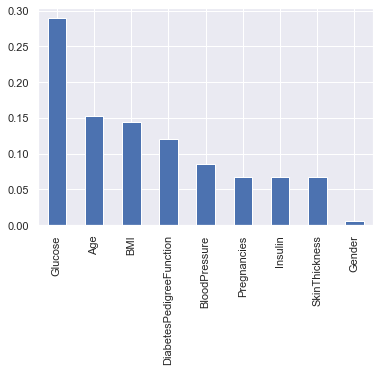

In [595]:
importance_series.plot.bar()

# 6. Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1. AdaBoost
2. XGBoost 
***
# Choose one of those model & fit it to the training dataset

In [596]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [602]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
gbm = xgb.XGBClassifier( 
                        n_estimators=800,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )
y_p= gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)

print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(gbm.score(X_test, y_test)*100,
                                    recall_score(y_test,y_p)*100 ,
                                   f1_score(y_test,y_p)*100 ,
                                   precision_score(y_test,y_p) *100
))

The Model Accuracy is 76.62%,      Recall is 71.25%, Percision is 67.86%,        F1-Score is 64.77% 


C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\asmaa\anaconda3\envs\metis\lib\site-packages\xgboost\core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


## Summary
In this notebook we discovered ensemble machine learning algorithms for improving the performance of models on your problems.

## Please prepare Power Point file with 1-2 slides to summerize your learnings . 